In [1]:
'''
Based on:
URL: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
URL: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
'''

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


'\nBased on:\nURL: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html\nURL: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Data

In [3]:
tot_num_packets = 4000
def_ttl = 1000

In [4]:
Map_Info = {}

with open('Map_0/map_0_info.pkl', 'rb') as file:
    Map_Info[0] = pickle.load(file)

with open('Map_1/map_1_info.pkl', 'rb') as file:
    Map_Info[1] = pickle.load(file)

with open('Map_2/map_2_info.pkl', 'rb') as file:
    Map_Info[2] = pickle.load(file)

# Plots

## Number of Packets Received

### Sel_Message Passing Algorithm

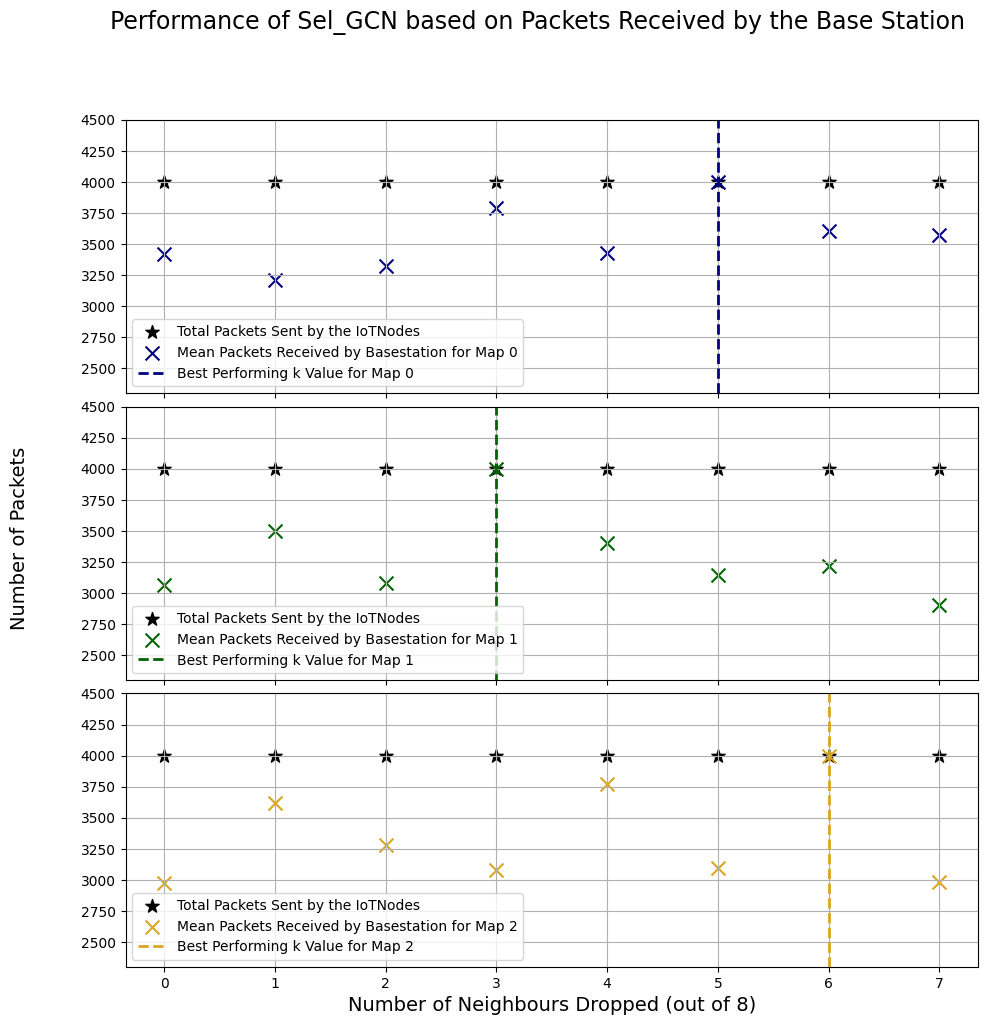

In [5]:
# Organise the data
for map_id in range(3):
    Map_Info[map_id]['k_avg_packets'] = np.array([Map_Info[map_id]['average_num_packets_received_k'][key] for key in range(0,8)])
    Map_Info[map_id]['best_k_packets'] = np.argmax(Map_Info[map_id]['k_avg_packets'])
    
Map_Info[0]['color'] = 'navy'
Map_Info[1]['color'] = 'darkgreen'
Map_Info[2]['color'] = 'goldenrod'

total_packets = np.array([tot_num_packets for i in range(0, 8)])

x = np.array(list(range(0,8)))

# Plot the data
fig = plt.figure(figsize=(11,11))
gs = fig.add_gridspec(3, hspace=0.05)
axs = gs.subplots(sharex=True, sharey=True)

for map_id in range(3):
    axs[map_id].scatter(x, total_packets, color='black', marker='*', s=100, label='Total Packets Sent by the IoTNodes')
    axs[map_id].scatter(x, Map_Info[map_id]['k_avg_packets'], marker='x', s=100, color=Map_Info[map_id]['color'], label='Mean Packets Received by Basestation for Map '+str(map_id))
    axs[map_id].axvline(x = Map_Info[map_id]['best_k_packets'], color=Map_Info[map_id]['color'], linestyle='--', linewidth=2, label='Best Performing k Value for Map '+str(map_id))  # Vertical line
    axs[map_id].grid(True)
    axs[map_id].legend(loc='lower left')

plt.ylim(2300, 4500)
plt.xlabel('Number of Neighbours Dropped (out of 8)', fontsize=14)
fig.supylabel('Number of Packets', fontsize=14)
fig.suptitle('Performance of Sel_GCN based on Packets Received by the Base Station', fontsize=17)

plt.savefig('Performance of Sel_GCN based on Packets Received by the Base Station.png')

plt.show()

### Comparison of the three methods

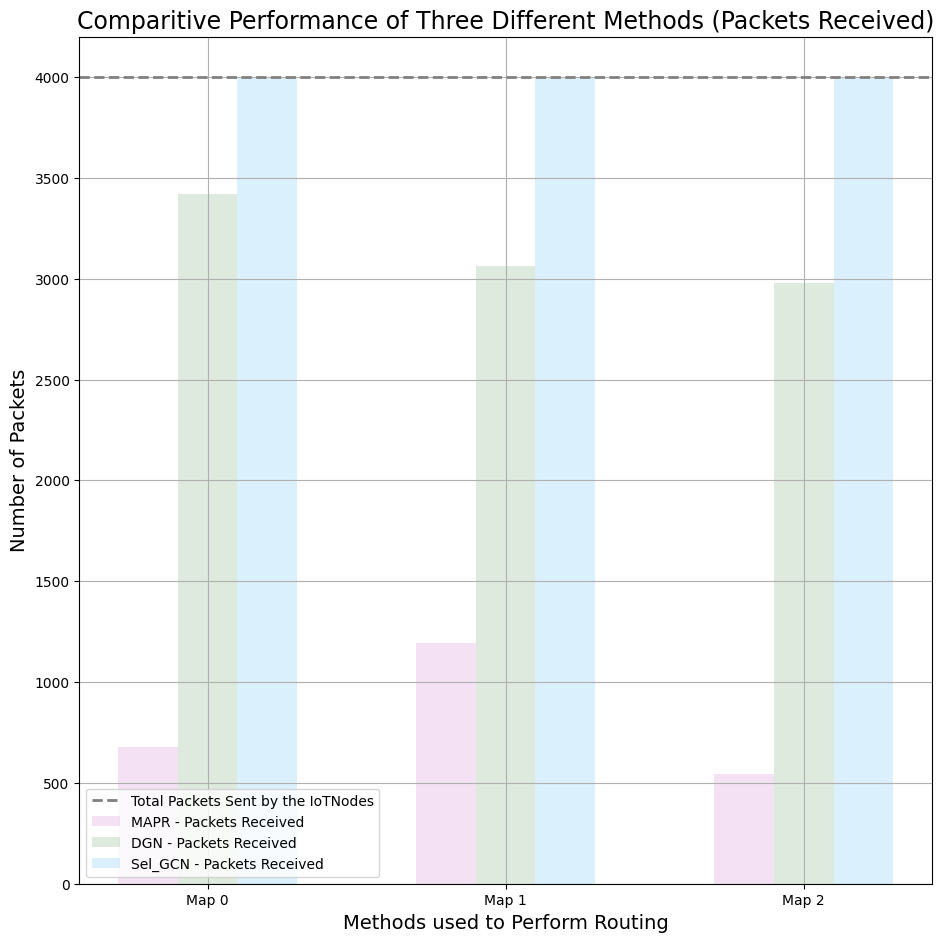

In [6]:
MAPR_Packets = np.array([np.mean(np.array(Map_Info[map_id]['MAPR_num_packets_received'])) for map_id in range(3)])
DGN_Packets = np.array([Map_Info[map_id]['average_num_packets_received_k'][0] for map_id in range(3)])
Sel_GCN_Packets = np.array([Map_Info[map_id]['average_num_packets_received_k'][Map_Info[map_id]['best_k_packets']] for map_id in range(3)])

total_packets = np.array([tot_num_packets for i in range(3)])

# Plot the graph
x = np.array([0,5,10])
width = 1

plt.figure(figsize=(11,11))

plt.axhline(y=tot_num_packets, color='grey', linestyle='--', linewidth=2, label='Total Packets Sent by the IoTNodes')
plt.bar(x, MAPR_Packets , width, color='plum', alpha=0.3, label='MAPR - Packets Received')
plt.bar(x + width, DGN_Packets, width, color='darkseagreen', alpha=0.3, label='DGN - Packets Received')
plt.bar(x + 2*width, Sel_GCN_Packets, width, color='lightskyblue', alpha=0.3, label='Sel_GCN - Packets Received')

plt.xlabel('Methods used to Perform Routing', fontsize=14)
plt.ylabel('Number of Packets', fontsize=14)

plt.title('Comparitive Performance of Three Different Methods (Packets Received)', fontsize=17)
plt.legend(loc='lower left')

plt.xticks(x + width, ('Map 0', 'Map 1', 'Map 2'))

plt.grid(True)

plt.savefig('Comparitive Performance of Three Different Methods (Packets Received).png')

plt.show()

## TTL

### Sel_Message Passing Algorithm

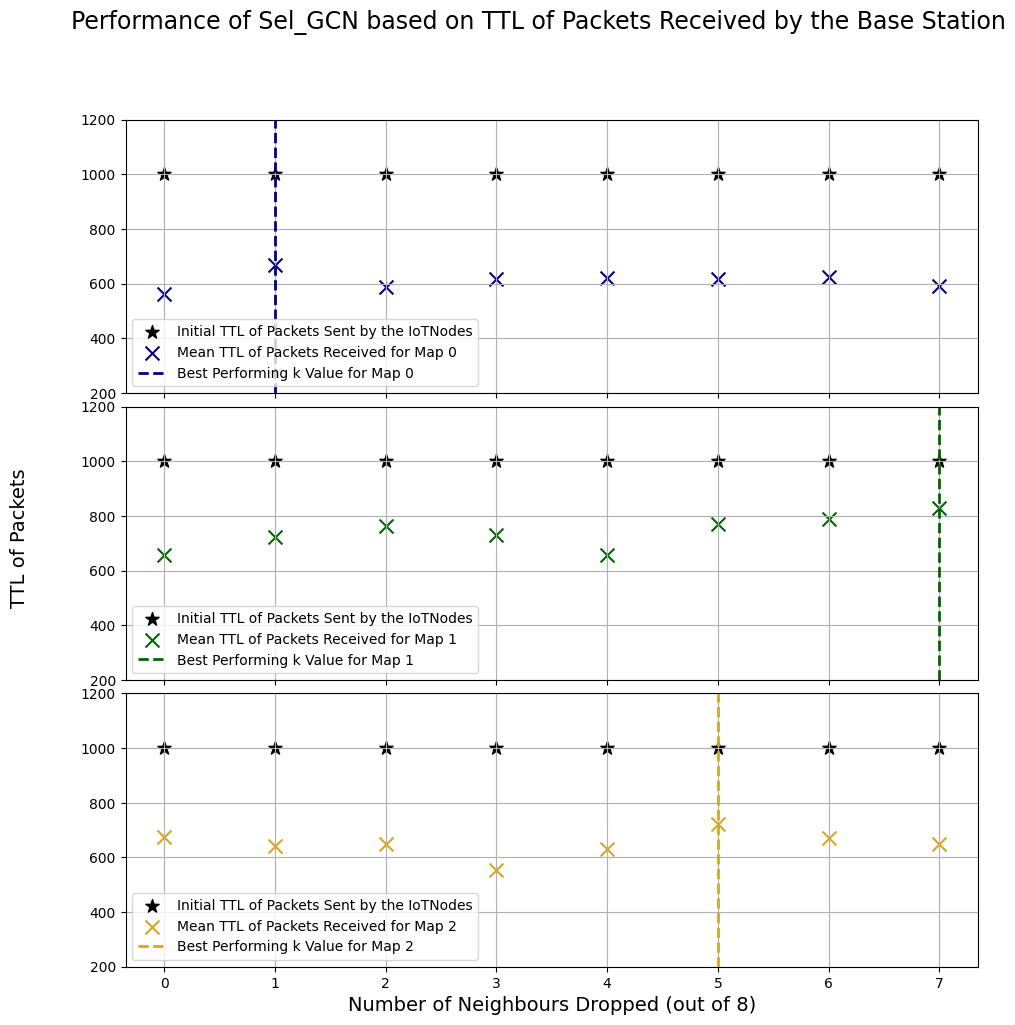

In [7]:
# Organise the data
for map_id in range(3):
    Map_Info[map_id]['k_avg_ttl'] = np.array([Map_Info[map_id]['average_mean_ttl_received_k'][key] for key in range(0,8)])
    Map_Info[map_id]['best_k_ttl'] = np.argmax(Map_Info[map_id]['k_avg_ttl'])
    
total_ttl = np.array([def_ttl for i in range(0, 8)])
x = np.array(list(range(0,8)))

# Plot the data
fig = plt.figure(figsize=(11,11))
gs = fig.add_gridspec(3, hspace=0.05)
axs = gs.subplots(sharex=True, sharey=True)

for map_id in range(3):
    axs[map_id].scatter(x, total_ttl, color='black', marker='*', s=100, label='Initial TTL of Packets Sent by the IoTNodes')
    axs[map_id].scatter(x, Map_Info[map_id]['k_avg_ttl'], marker='x', s=100, color=Map_Info[map_id]['color'], label='Mean TTL of Packets Received for Map '+str(map_id))
    axs[map_id].axvline(x = Map_Info[map_id]['best_k_ttl'], color=Map_Info[map_id]['color'], linestyle='--', linewidth=2, label='Best Performing k Value for Map '+str(map_id))  # Vertical line
    axs[map_id].grid(True)
    axs[map_id].legend(loc='lower left')

plt.ylim(200, 1200)
plt.xlabel('Number of Neighbours Dropped (out of 8)', fontsize=14)
fig.supylabel('TTL of Packets', fontsize=14)
fig.suptitle('Performance of Sel_GCN based on TTL of Packets Received by the Base Station', fontsize=17)

plt.savefig('Performance of Sel_GCN based on TTL of Packets Received by the Base Station.png')

plt.show()

### Comparison of the three methods

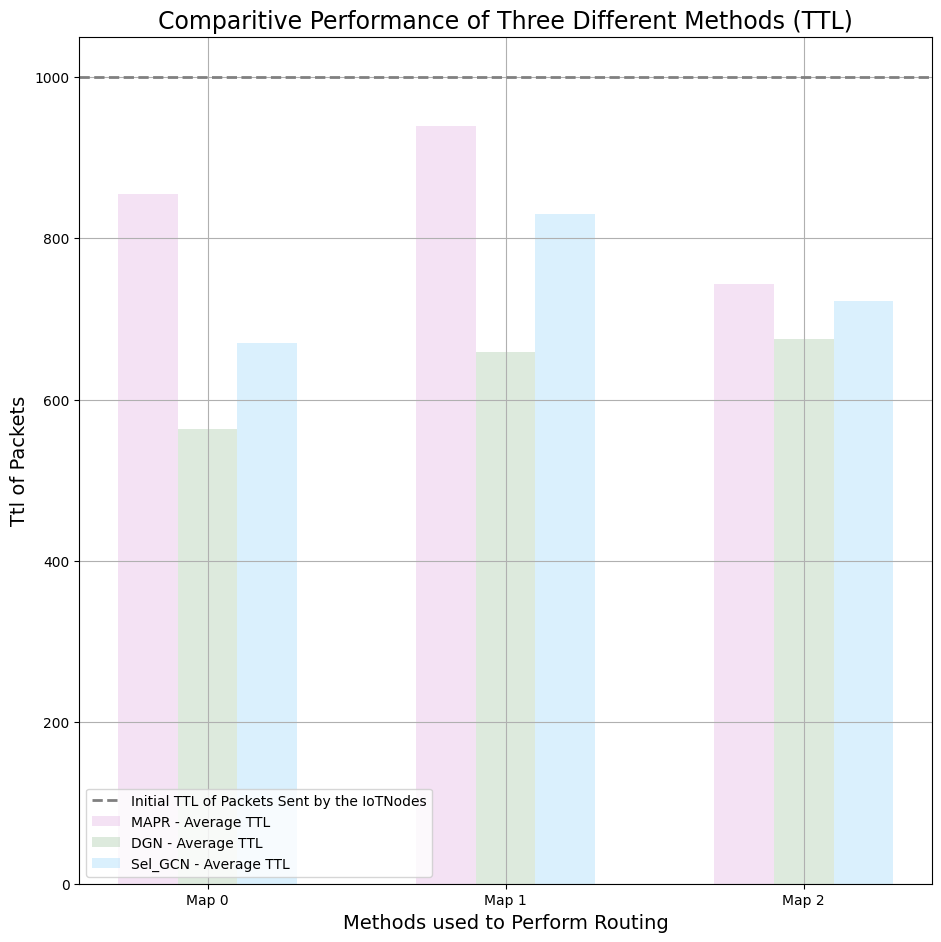

In [8]:
MAPR_Ttl = np.array([np.mean(np.array(Map_Info[map_id]['MAPR_mean_ttl_received'])) for map_id in range(3)])
DGN_Ttl = np.array([Map_Info[map_id]['average_mean_ttl_received_k'][0] for map_id in range(3)])
Sel_GCN_Ttl = np.array([Map_Info[map_id]['average_mean_ttl_received_k'][Map_Info[map_id]['best_k_ttl']] for map_id in range(3)])

total_ttl = np.array([def_ttl for i in range(3)])

# Plot the graph
x = np.array([0,5,10])
width = 1

plt.figure(figsize=(11,11))

plt.axhline(y=def_ttl, color='grey', linestyle='--', linewidth=2, label='Initial TTL of Packets Sent by the IoTNodes')
plt.bar(x, MAPR_Ttl , width, color='plum', alpha=0.3, label='MAPR - Average TTL')
plt.bar(x + width, DGN_Ttl, width, color='darkseagreen', alpha=0.3, label='DGN - Average TTL')
plt.bar(x + 2*width, Sel_GCN_Ttl, width, color='lightskyblue', alpha=0.3, label='Sel_GCN - Average TTL')

plt.xlabel('Methods used to Perform Routing', fontsize=14)
plt.ylabel('Ttl of Packets', fontsize=14)
plt.title('Comparitive Performance of Three Different Methods (TTL)', fontsize=17)
plt.legend(loc='lower left')

plt.xticks(x + width, ('Map 0', 'Map 1', 'Map 2'))
plt.grid(True)
plt.savefig('Comparitive Performance of Three Different Methods (TTL).png')
plt.show()
